In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import reorder
from reorder import BoxList
from reorder import BoxCut
from reorder import BoxSort
from reorder.fake_data import generate_nested_data

In [3]:
import numpy as np

In [4]:
from plotting import mplot
import matplotlib.pyplot as plt

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


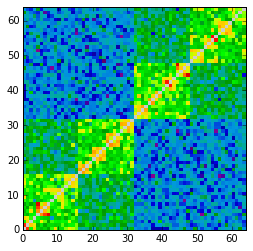

In [5]:
test_soln = generate_nested_data(noise=0.05)
mplot(test_soln)

In [6]:
bs = BoxSort(test_soln)
result, sort_order = bs()
bc = BoxCut(result)
boxes, fitness = bc.fit_boxes(result)

In [7]:
boxes._random_bounded_pareto(limit=5)

2

In [8]:
# this could start a bit higher
initial_temp = 0.01

count = 20
final_temp = initial_temp * (0.9**count)
initial_temp, final_temp

(0.01, 0.0012157665459056935)

In [9]:
bc.box_temperature

0.011438396227480507

In [10]:
cur_fit = 30
fitness = 31
improvement_ratio = (cur_fit - fitness) / cur_fit
improvement_ratio

-0.03333333333333333

In [11]:
100 * improvement_ratio

-3.3333333333333335

In [12]:
# this simulated annealing is punishing pretty harshly.
# %3 worse move is only accpeted 

In [13]:
temp = initial_temp
100 * np.exp(improvement_ratio / temp)

3.5673993347252408

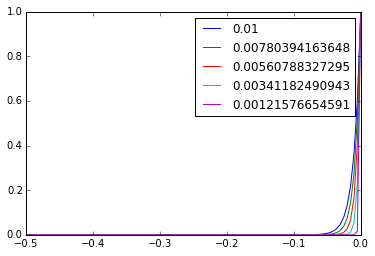

In [14]:
temp = initial_temp
temps = np.linspace(initial_temp, final_temp, 5)

improvement_ratio = np.linspace(-0.5, 0, 100)

fig, ax = plt.subplots()
for temp in temps:
    p = np.exp( improvement_ratio / temp)
    ax.plot(improvement_ratio, p, label=temp)

ax.legend(loc='best')
#ax.semilogy()
ax.set_ylim(0, 1)
plt.show()

In [15]:
# temp starts at temp=0.01
# every N (matrix size) iterations, temp = temp * 0.9

In [16]:
# includes zero. excludes 1.
np.random.random()

0.08108385487072145

In [17]:
for i in boxes.items():
    print(i)

(0, 16)
(16, 32)
(32, 48)
(48, 64)


In [18]:
steps = []
N = 1000
steps2 = []
for n in range(N):
    step = int(n * (100 + n) / 100)
    steps.append(step)
    steps2.append(int(n*n))

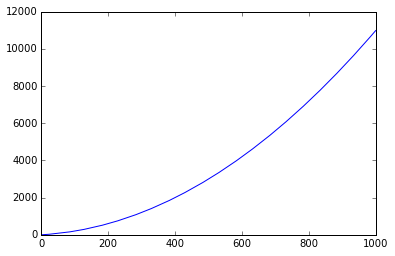

In [19]:
plt.plot(list(range(N)), steps)
#plt.plot(list(range(N)), steps2)